In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
df=pd.read_excel("ECOMM DATA.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [15]:
TOTAL_SALES= df['Sales'].sum()
TOTAL_SALES

12642501.909880001

In [29]:
df['year']=df['Order Date'].astype(str).str[:4]
df['year'].astype(int)

0        2012
1        2013
2        2013
3        2013
4        2013
         ... 
51285    2014
51286    2014
51287    2013
51288    2012
51289    2012
Name: year, Length: 51290, dtype: object

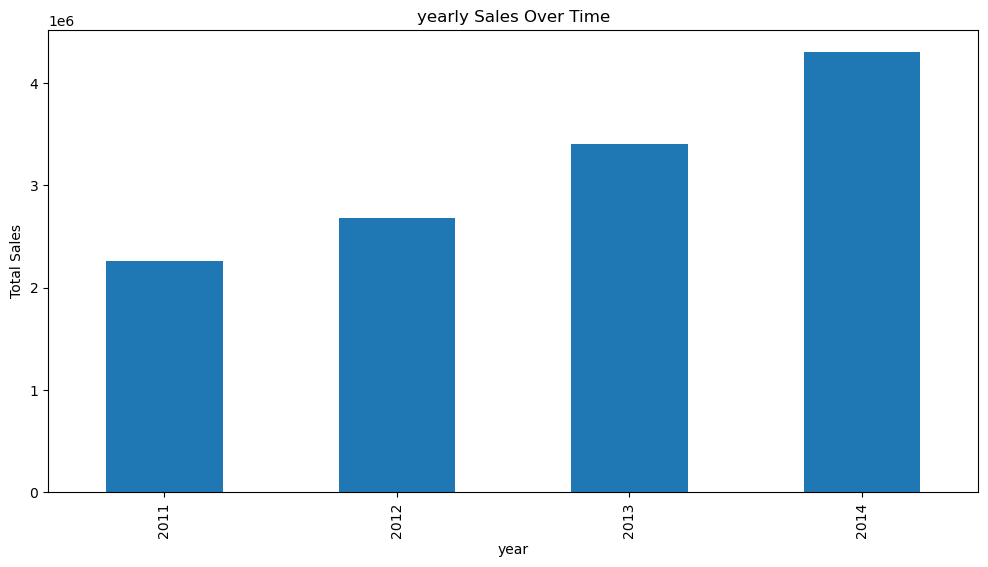

In [38]:
yearly_sales=df.groupby('year')['Sales'].sum()
yearly_sales.plot(kind='bar', figsize=(12, 6), title='yearly Sales Over Time')
plt.xlabel('year')
plt.ylabel('Total Sales')
plt.show()

In [39]:
df['month']=df['Order Date'].astype(str).str[5:7]
df['month'].astype(int)
df['month']

0        07
1        02
2        10
3        01
4        11
         ..
51285    06
51286    06
51287    12
51288    02
51289    05
Name: month, Length: 51290, dtype: object

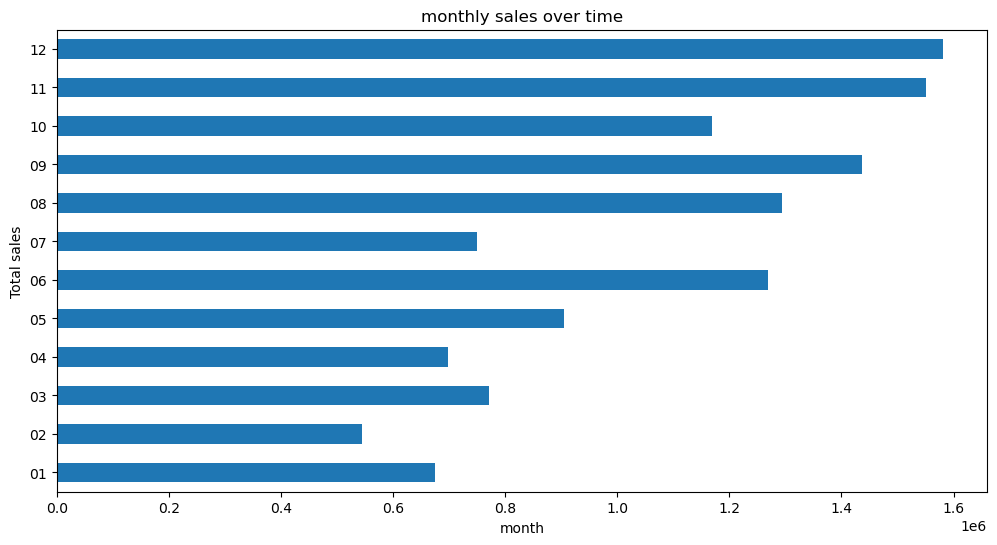

In [42]:
monthly_sales=df.groupby('month')['Sales'].sum()
monthly_sales.plot(kind="barh",figsize=(12,6),title="monthly sales over time")
plt.xlabel('month') 
plt.ylabel('Total sales')
plt.show()

In [50]:
best_selling_products=df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
best_selling_products

Product Name
Apple Smart Phone, Full Size                                86935.7786
Cisco Smart Phone, Full Size                                76441.5306
Motorola Smart Phone, Full Size                             73156.3030
Nokia Smart Phone, Full Size                                71904.5555
Canon imageCLASS 2200 Advanced Copier                       61599.8240
Hon Executive Leather Armchair, Adjustable                  58193.4841
Office Star Executive Leather Armchair, Adjustable          50661.6840
Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
Samsung Smart Phone, Cordless                               48653.4600
Nokia Smart Phone, with Caller ID                           47877.7857
Name: Sales, dtype: float64

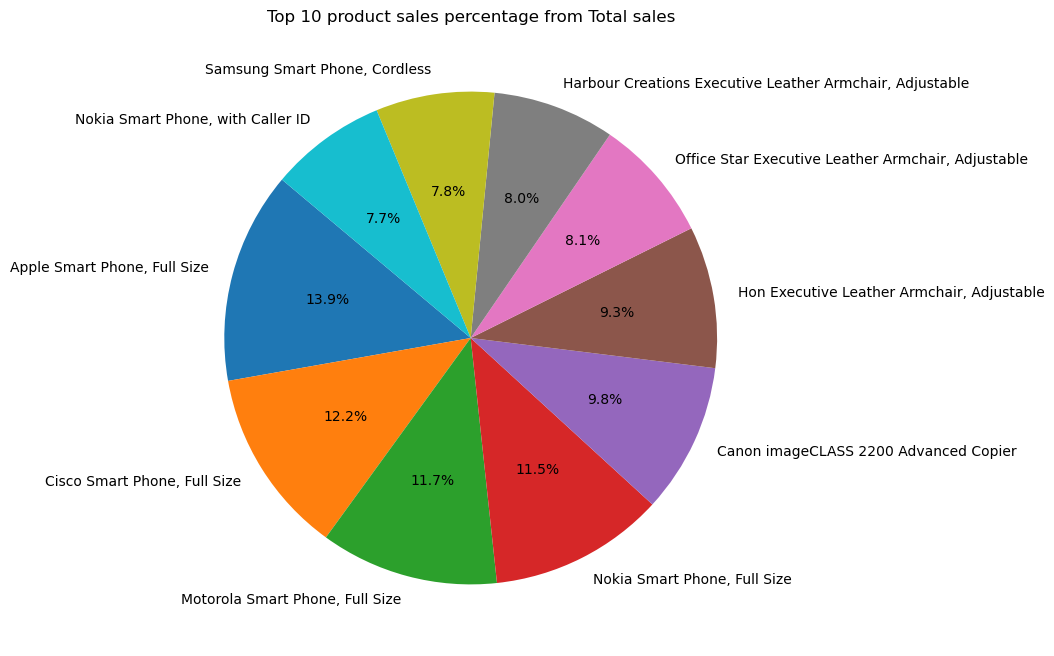

In [56]:

percentagefromtotalsales=(best_selling_products/TOTAL_SALES)*100
plt.figure(figsize=(8,8))
plt.pie(percentagefromtotalsales,labels=best_selling_products.index,autopct='%1.1f%%',startangle=140)
plt.title("Top 10 product sales percentage from Total sales")
plt.show()

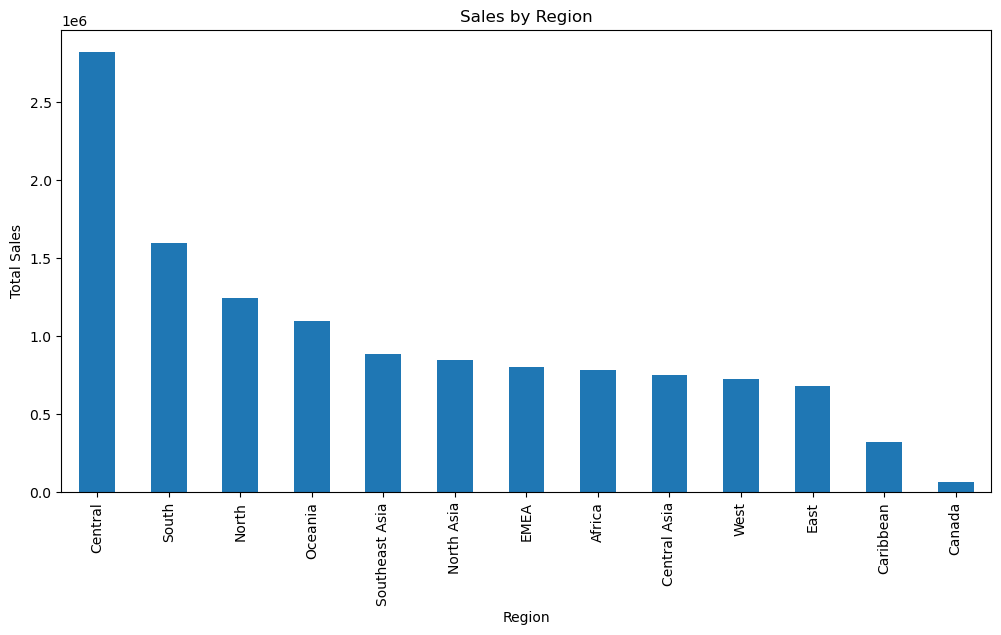

In [58]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', figsize=(12, 6), title='Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

In [66]:
#Central Region top selling product
target_region='Central'
region_data=df[df['Region']==target_region]
product_sales=region_data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
product_sales.index[0]

'Nokia Smart Phone, Full Size'

In [67]:
product_sales.values[0]

20479.6255

In [68]:
#Newyork city top selling category
target_city='New York City'
city_data=df[df['City']==target_city]
product_sales=city_data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
product_sales.index[0]

'Technology'

In [69]:
product_sales.values[0]

109316.106